# Analysis of CO2 Emissions Data for countries for years 1960-2014

### Libraries

In [1]:
# load the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
py.sign_in('','')
import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
# load the data (Data Source: WorldBank {https://data.worldbank.org})

co2_emissions = pd.read_csv("CO2Emissions_KT.csv",index_col=[0,1], header=2)
cols = []

# select required columns

for i in range(1960,2015):
    cols.append(str(i))
    
co2_emissions = co2_emissions[cols[:len(cols)]]

co2_emissions = co2_emissions.reset_index()

country_metadata = pd.read_csv("Metadata_Country.csv", header=0, usecols=['Country Code','Region','IncomeGroup'])
country_metadata = country_metadata.dropna()

### Data Preprocessing

In [3]:
# merge the CO2 Emissions data with Country metadata to get only the countries and remove subgroups like Europe, Middle East etc

co2_emissions_metadata_merged = co2_emissions.merge(country_metadata,on=['Country Code'])
co2_emissions_metadata_merged = co2_emissions_metadata_merged.fillna(0)

In [4]:
# remove the unnecessary columns to get country and year wise CO2 Emissions Data

co2_emissions_country = co2_emissions_metadata_merged
co2_emissions_country = co2_emissions_country.set_index(['Country Name'])
co2_emissions_country = co2_emissions_country.drop(['Country Code','Region','IncomeGroup'], axis=1)
co2_emissions_country.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,2786.920,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042


### Line Chart

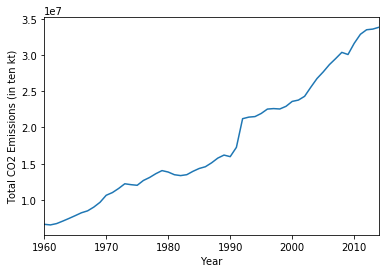

In [5]:
# plot total CO2 emissions for the world for 1960-2014

ax = co2_emissions_country.sum().plot()
ax.set_xlabel('Year')
ax.set_ylabel('Total CO2 Emissions (in ten kt)')
plt.show()

### Line Subplots

In [6]:
# for a given year, determine the top CO2 emitters 

def top_co2emmitors(year, top=5):
    df = co2_emissions_country[year]
    df_sorted = df.sort_values(ascending=False)
    df_sorted = df_sorted.reset_index().head(top)
    df_sorted.index = df_sorted.index+1
    
    return df_sorted.round(2)

In [7]:
# function to draw subplots for CO2 emissions 1960-2014 

def subplots(topdf):
    
    plt.figure(figsize=(10, 20))

    for i in range(len(topdf)):
        plt.subplot(len(topdf),2,i+1)
        ax =co2_emissions_country.loc[topdf.loc[i,'Country Name']].plot()
        ax.set_xlabel("year")
        ax.set_ylabel("Total Co2 Emissions")
        plt.title(topdf.loc[i,'Country Name'])

    plt.tight_layout()
    plt.show()

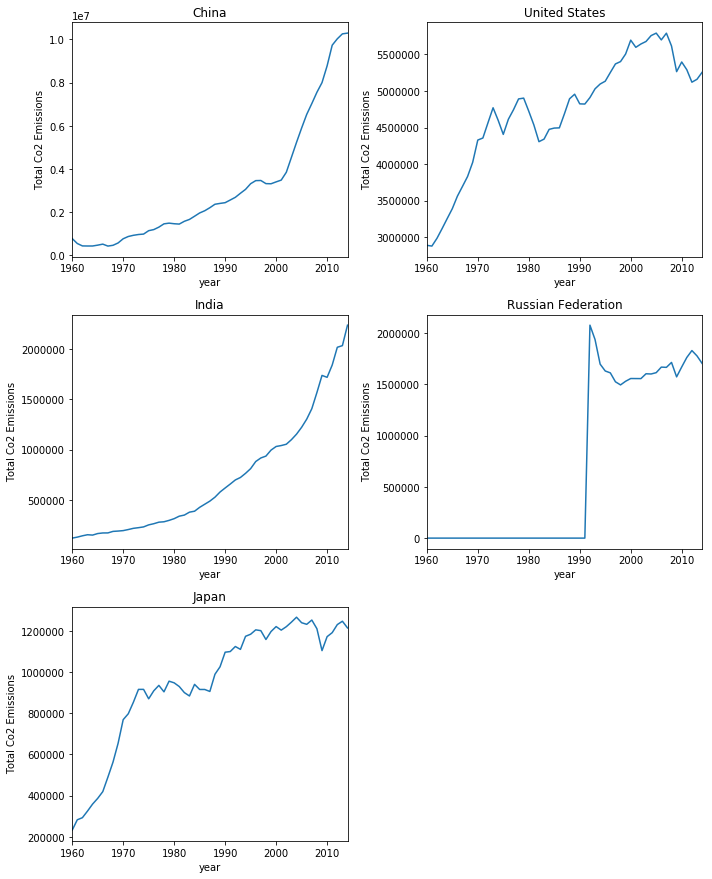

In [8]:
# draw subplots for 1960-2014 for top CO2 emittors of a given year

subplots(top_co2emmitors('2014',5).reset_index(drop=True))

### Overlaying Plots

In [9]:
# function to draw multi-line plots for CO2 emissions 1960-2014

def multilineplot(topdf):
    
    # define the figure size
    plt.figure(figsize=(15, 10))
    
    # loop through dataframe to make plots overlying
    for i in range(len(topdf)):
        co2_emissions_country.loc[topdf.loc[i,'Country Name']].plot()
           
    # add legends,axis labels and title
    plt.legend(loc='upper center')
    plt.xlabel('Year')
    plt.ylabel('Total CO2 Emissions')
    plt.title('Comparative Chart of CO2 emissions for top countries ')
    
    plt.show()

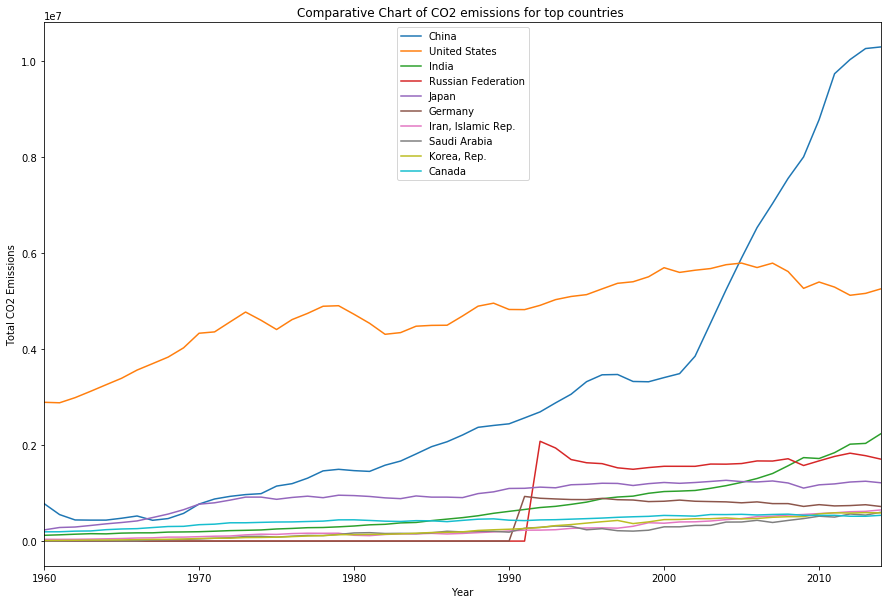

In [10]:
# draw overlying plots for 1960-2014 for top CO2 emittors of a given year 

multilineplot(top_co2emmitors('2014',10).reset_index(drop=True))

### Pie Subplots

In [11]:
# function to draw multi-year pie charts for CO2 emissions 

def multiyearpie(numyear=2):
    
    # define the figure size
    plt.figure(figsize=(12, 20))
    
    # get the total number of years
    total_years = len(co2_emissions_country.columns)
    
    # loop through to make pie charts for given year successively
    for i in range(numyear):
        # draw as a subplot
        plt.subplot(numyear,2,i+1)
        
        # get the data for the particular year by subsetting the dataframe
        # get the name of the column as a list to be used as a year
        # convert the list to get the year as a string
        # sort the data frame in descending order
        df = co2_emissions_country.iloc[:,total_years-(i+1):total_years-i]
        col = list(df)
        year = ''.join(col)
        df_sorted = df.sort_values(by=year,ascending=False)
        
        # reset the index of the sorted dataframe 
        # add one to the index
        # define other countries apart from top 10
        # save the data for top 10 emittor countries
        df_sorted = df_sorted.reset_index()
        df_sorted.index = df_sorted.index+1
        others = df_sorted[10:].sum()[1]
        top = df_sorted[:10]
        top.loc[11] = ['All Other Countries', others]

        # define the pie chart with appropriate parameters
        ax = top[year].plot.pie(subplots=False,autopct='%0.1f',fontsize=12,legend=False,labels=top['Country Name'],
                                shadow=False,explode=(0.15,0.12,0.10,0,0,0,0,0,0,0,0),startangle=135)
        
        # add axis label and title
        ax.set_xlabel(year)
        ax.set_ylabel("")
        plt.title('Comparative Pie Chart of CO2 emissions for top countries ')

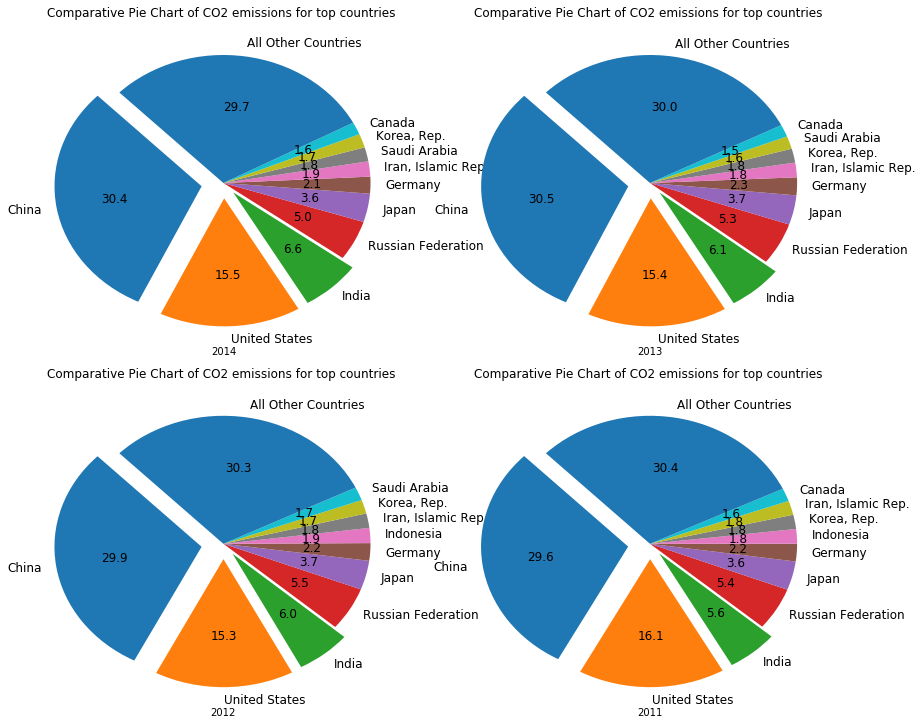

In [12]:
# draw pie chart for total CO2 emissions for last four years

multiyearpie(4)
plt.tight_layout()

### World Map

In [13]:
# function to draw world map of total CO2 emissions for a given year 

def worldmap(year):
    df = co2_emissions_metadata_merged[['Country Name','Country Code',year]]

    data = [ dict(
            type = 'choropleth',
            locations = df['Country Code'],
            z = df[year],
            text = df['Country Name'],
            colorscale = [[0,"rgb(0, 0, 0)"],[0.35,"rgb(40, 40, 40)"],[0.5,"rgb(80, 80, 80)"],\
                [0.6,"rgb(120, 120, 120)"],[0.7,"rgb(180, 180, 180)"],[1,"rgb(250, 250, 250)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(40,40,40)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                ticksuffix = 'T',
                title = 'Total CO2 Emissions <br>(in million tonnes)'),
          ) ]

    layout = dict(
        title = ' Global CO2 Emissions - ' + year,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return fig

In [14]:
# draw world map for total CO2 emissions for 2014

fig = worldmap('2014')
py.iplot( fig, validate=False, filename='d3-world-map' )